In [29]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import numpy as np
np.set_printoptions(edgeitems=10,linewidth=180,
                    formatter=dict(float=lambda x: "%8.3f" % x))
        


In [62]:
def opa(a, b):
    """ return rot, scale, translation, and rmsd of shifting `b` to concord with `a`.
    
    `a` and `b` are N D-dim vectors.
    
    Suppose we return r, s, t, d.
    
    To apply the recovered transform to other M D-dim vectors X, calculate
    `X.dot(r) * s + t`
    """
    aT = a.mean(0)
    bT = b.mean(0)
    A = a - aT 
    B = b - bT
    aS = np.sum(A * A)**.5
    bS = np.sum(B * B)**.5
    A /= aS
    B /= bS
    U, _, V = np.linalg.svd(np.dot(B.T, A))
    aR = np.dot(U, V)
    if np.linalg.det(aR) < 0:
        V[1] *= -1
        aR = np.dot(U, V)
    aS = aS / bS
    aT-= (bT.dot(aR) * aS)
    # the original only returned a rotation-only "rms"... between scaled+translated points
    aD = (np.sum((A - B.dot(aR))**2) / len(a))**.5
    # the xform in general is : a[1] = a[1].dot(r) * s + t
    # if we actually DO the full transform "LONG HAND"
    #aD = np.sqrt(((a - (b.dot(aR) * aS + aT))**2).sum() / len(a))
    # equivalently, include scaling into previous rmsd as
    aD *= (aS * bS)
    return aR, aS, aT, aD 
        
def gpa(v, n=-1):
    if n < 0:
        p = avg(v)
    else:
        p = v[n]
    l = len(v)
    r, s, t, d = np.ndarray((4, l), object)
    for i in range(l):
        r[i], s[i], t[i], d[i] = opa(p, v[i]) 
    return r, s, t, d

def avg(v):
    v_= np.copy(v)
    l = len(v_) 
    R, S, T = [list(np.zeros(l)) for _ in range(3)]
    for i, j in np.ndindex(l, l):
        r, s, t, _ = opa(v_[i], v_[j]) 
        R[j] += np.arccos(min(1, max(-1, np.trace(r[:1])))) * np.sign(r[1][0]) 
        S[j] += s 
        T[j] += t 
    for i in range(l):
        a = R[i] / l
        r = [np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]
        v_[i] = v_[i].dot(r) * (S[i] / l) + (T[i] / l) 
    return v_.mean(0)

def rmsd(V, W):
    """
    Calculate Root-mean-square deviation from two sets of vectors V and W.

    Parameters
    ----------
    V : array
        (N,D) matrix, where N is points and D is dimension.
    W : array
        (N,D) matrix, where N is points and D is dimension.

    Returns
    -------
    rmsd : float
        Root-mean-square deviation between the two vectors
    """
    diff = np.array(V) - np.array(W)
    N = len(V)
    return np.sqrt((diff * diff).sum() / N)

v = np.array([[1,2,3], [2,3,4]]); w = np.vstack((v[0,]+1, v[1,]+4)); print(v); print(w)
print( v - w)
print( ((v-w) * (v-w)).sum() ) # 3 * 1^2 + 3 * 4^2 --> 51
print( ((v-w) * (v-w)).sum() / len(v)) # 51 / (N=2)
print(rmsd(v,w), np.sqrt(51.0/2))

[[1 2 3]
 [2 3 4]]
[[2 3 4]
 [6 7 8]]
[[-1 -1 -1]
 [-4 -4 -4]]
51
25.5
5.049752469181039 5.049752469181039


opa r
 [[   0.865   -0.501]
 [   0.501    0.865]] 
opa s
 1.3150192383374242 
opa t
 [-208.368   53.110] 
opa d
 54.17321261662345
opa arr1 orig arr2 -->
 [[ 588.000  443.000  477.000  557.000  701.493  372.669]
 [ 178.000  443.000  130.129  374.307  186.366  393.329]
 [  56.000  436.000   52.000  334.000   70.894  398.942]
 [  50.000  376.000   67.662  306.953   70.895  357.841]
 [ 129.000  360.000  111.916  323.000  131.831  346.942]
 [  15.000  342.000   55.119  275.854   36.129  330.715]
 [  92.000  293.000  107.935  277.723   97.466  298.040]
 [  79.000  269.000  101.899  259.730   78.740  281.541]
 [ 276.000  295.000  175.000  329.000  207.575  312.202]
 [ 281.000  331.000  171.000  345.000  213.566  333.046]
 [ 785.000  260.000  589.000  527.000  809.183  264.727]
 [ 754.000  174.000  591.000  468.000  772.581  196.267]
 [ 405.000  233.000  299.000  363.000  371.093  269.186]
 [ 386.000  167.000  306.000  317.000  348.748  212.225]
 [ 466.000   59.000  406.000  288.000  443.440 

<ipython-input-64-eee4bd49667a>:6: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  p.gcf().canvas.set_window_title('%f' % e)


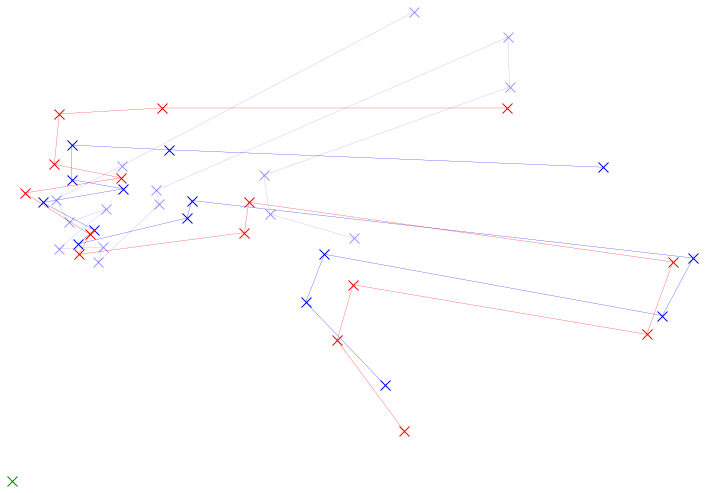

<ipython-input-64-eee4bd49667a>:6: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  p.gcf().canvas.set_window_title('%f' % e)


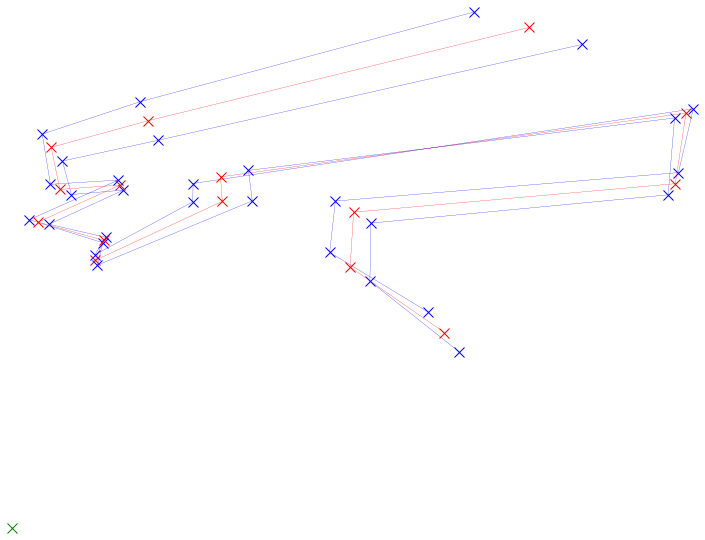

In [64]:
import matplotlib.pyplot as p; p.rcParams['toolbar'] = 'None';

def plt(o, e, b):
    p.figure(figsize=(10, 10), dpi=72, facecolor='w').add_axes([0.05, 0.05, 0.9, 0.9], aspect='equal')
    p.plot(0, 0, marker='x', mew=1, ms=10, c='g', zorder=2, clip_on=False)
    p.gcf().canvas.set_window_title('%f' % e)
    x = np.ravel(o[0].T[0])
    y = np.ravel(o[0].T[1])
    p.xlim(min(x), max(x)) 
    p.ylim(min(y), max(y))
    a = []
    for i, j in np.ndindex(len(o), 2):
        a.append(o[i].T[j])    
    O = p.plot(*a, marker='x', mew=1, ms=10, lw=.25, c='b', zorder=0, clip_on=False)
    O[0].set(c='r', zorder=1)
    if not b:
        O[2].set_color('b')
        O[2].set_alpha(0.4)
    p.axis('off')     
    p.show()

def opa_out(a, verbose=False):
    rmsd0 = rmsd(a[0],a[1]) if verbose else 0.0
    r, s, t, d = opa(a[0], a[1])
    a[1] = a[1].dot(r) * s + t
    if(verbose):
        print("opa r\n",r,"\nopa s\n",s,"\nopa t\n",t,"\nopa d\n",d)
        print("opa arr1 orig arr2 -->\n", np.hstack((a[0],a[2],a[1])))
        print("original rmsd -->",rmsd0, "  final rmsd -->",rmsd(a[0],a[1]), "  d=",d)
    return a, d, False
def opa_out2(a, verbose=False):
    """ extended return values. """
    r, s, t, d = opa(a[0], a[1])
    a[1] = a[1].dot(r) * s + t
    if(verbose):
        print("opa r\n",r,"\nopa s\n",s,"\nopa t\n",t,"\nopa d\n",d)
        print("opa arr1 orig arr2 -->\n", np.hstack((a[0],a[2],a[1])))
        print("original rmsd -->",rmsd(a[0],a[2]), "  final rmsd -->",rmsd(a[0],a[1]), d)
    return a, r, s, t, d, False
def gpa_out(a):
    g = gpa(a, -1) 
    D = [avg(a)]
    for i in range(len(a)):
        D.append(a[i].dot(g[0][i]) * g[1][i] + g[2][i])
    return D, sum(g[3])/len(a), True 

# Fly wings example (Klingenberg, 2015 | https://en.wikipedia.org/wiki/Procrustes_analysis)
arr1 = np.array([[588.0, 443.0], [178.0, 443.0], [56.0, 436.0], [50.0, 376.0], [129.0, 360.0], [15.0, 342.0], [92.0, 293.0], [79.0, 269.0], [276.0, 295.0], [281.0, 331.0], [785.0, 260.0], [754.0, 174.0], [405.0, 233.0], [386.0, 167.0], [466.0, 59.0]])
arr2 = np.array([[477.0, 557.0], [130.129, 374.307], [52.0, 334.0], [67.662, 306.953], [111.916, 323.0], [55.119, 275.854], [107.935, 277.723], [101.899, 259.73], [175.0, 329.0], [171.0, 345.0], [589.0, 527.0], [591.0, 468.0], [299.0, 363.0], [306.0, 317.0], [406.0, 288.0]])

plt(*opa_out([arr1, arr2, np.matrix.copy(arr2)], verbose=True))
plt(*gpa_out([arr1, arr2]))


<ipython-input-2-c16c133ebe7f>:6: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  p.gcf().canvas.set_window_title('%f' % e)


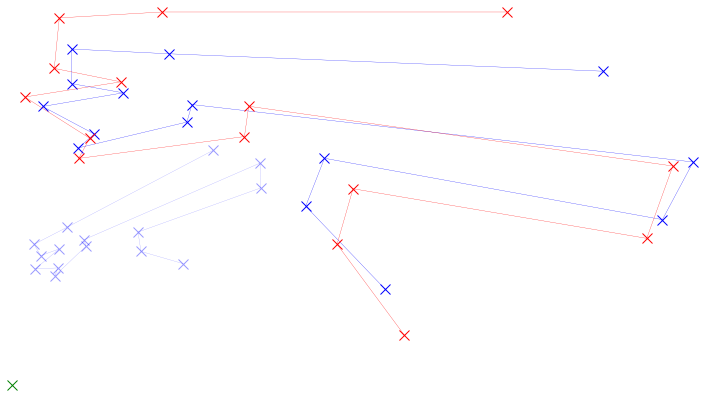

<ipython-input-2-c16c133ebe7f>:6: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  p.gcf().canvas.set_window_title('%f' % e)


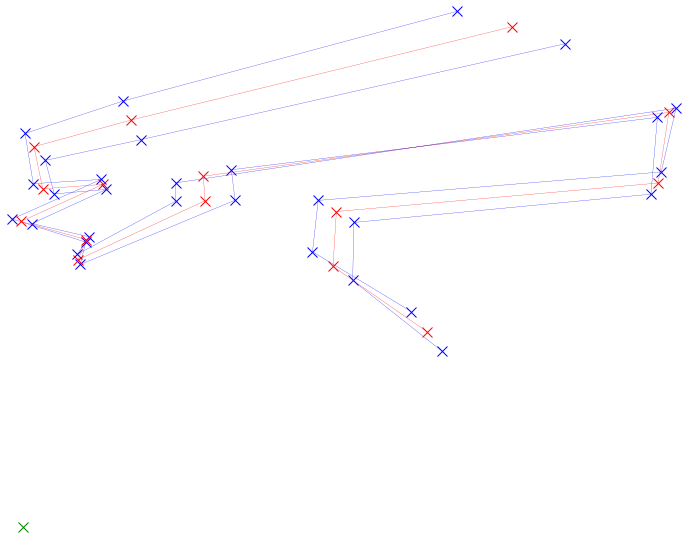

In [3]:
# Scaled fly wings
arr1b = arr1 * 2

plt(*opa_out([arr1b, arr2, np.matrix.copy(arr2)]))

plt(*gpa_out([arr1b, arr2]))


In [82]:
# CHECK: apply some random-ish transform for N D-dim vectors
#        and see that opa_out retrieves that same transform.
N=8; D=4
arr1 = np.random.rand(N,D) # Four 4-d vectors

y = np.random.rand(N,D)
x = np.random.rand(N,D)
(a, r, s, t, d, is_opa) = opa_out2([y, x, np.matrix.copy(x)], verbose=True)
# r is a "random" rotation matrix
eps = 0.00 # oh --- even a small eps can destroy closeness of 'r'
arr2 = arr1.dot(r) * s + t + eps*x  # arr2 is a known rotate, scale, translate + "small noise"

# double-check:
(aa,rr,ss,tt,dd,is_opa) = opa_out2([arr2, arr1, np.copy(arr1)], verbose=True)
print("rmsd of fit", dd)
print("rms r", rmsd(r,rr))
print("rms s", ((s-ss)**2 / np.sqrt(2)))
print("rms t", rmsd(t,tt))
assert( np.abs(rmsd(r,rr)) < eps + 1e-3 )
assert( (s-ss)**2 / np.sqrt(2) < eps + 1e-3 )
assert( np.abs(rmsd(t,tt)) < eps + 1e-3 )


opa r
 [[   0.170   -0.113   -0.940    0.273]
 [   0.003   -0.868    0.233    0.439]
 [   0.956   -0.095    0.111   -0.254]
 [  -0.238   -0.474   -0.223   -0.818]] 
opa s
 0.847208409744616 
opa t
 [   0.126    1.031    0.676    0.776] 
opa d
 0.44869679631814513
opa arr1 orig arr2 -->
 [[   0.272    0.142    0.272    0.556    0.201    0.570    0.011    0.937   -0.023    0.214    0.452    0.383]
 [   0.484    0.075    0.151    0.959    0.913    0.779    0.520    0.133    0.655    0.275    0.126    1.073]
 [   0.480    0.013    0.133    0.865    0.311    0.883    0.377    0.684    0.341    0.046    0.508    0.621]
 [   0.418    0.601    0.771    0.542    0.098    0.842    0.318    0.096    0.381    0.338    0.776    0.976]
 [   0.897    0.020    0.362    0.176    0.384    0.782    0.904    0.885    0.737   -0.010    0.442    0.348]
 [   0.474    0.126    0.623    0.961    0.226    0.884    0.699    0.339    0.659    0.167    0.671    0.772]
 [   0.244    0.605    0.555    0.596    0.841